In [1]:
import jax.numpy as jnp
import numpy as np
import time
import chex
import jax
import gymnasium as gym
import exciting_environments as excenv
import random
import matplotlib.pyplot as plt
import diffrax

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
BATCH_SIZE=5
pend=excenv.make('Pendulum-v0',batch_size=BATCH_SIZE,solver=diffrax.Dopri5())
mass=excenv.make('MassSpringDamper-v0',batch_size=BATCH_SIZE)
cart=excenv.make('CartPole-v0',batch_size=BATCH_SIZE)

## Pendulum

In [7]:
import time
import random
for batch_size in [10,100,1000,10000,100000]:
    env=excenv.make('Pendulum-v0',batch_size=batch_size,l=[np.random.uniform(0,2) for _ in range(batch_size)])
    act=[env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))) for _ in range(10000)]
    env.reset(random_key=jax.random.PRNGKey(9))
    start_t = time.time()
    for i in range(10000):
        #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
        obs,reward,a,b,_ = env.step(act[i])
    ex_time= time.time() -start_t
    print(f"Batch_Size:{batch_size} - diffrax Computation Time: {ex_time} \n")

Batch_Size:10 - diffrax Computation Time: 0.1781623363494873 

Batch_Size:100 - diffrax Computation Time: 0.19017267227172852 

Batch_Size:1000 - diffrax Computation Time: 0.2792537212371826 

Batch_Size:10000 - diffrax Computation Time: 1.4298605918884277 

Batch_Size:100000 - diffrax Computation Time: 9.325141668319702 



### Compare 2 Envs

In [4]:
import time
import random
batch_size=5
sim_len=10000
env1=excenv.make('Pendulum-v0',batch_size=batch_size,solver=diffrax.Euler())
env2=excenv.make('Pendulum-v0',batch_size=batch_size,solver=diffrax.Dopri5())
act=[env1.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))) for _ in range(sim_len)]
#act= np.zeros_like(act)
obs1_init,_=env1.reset(random_key=jax.random.PRNGKey(6))
obs2_init,_=env2.reset(random_key=jax.random.PRNGKey(6))
data_1=[]
data_2=[]
for i in range(sim_len):
    obs1,reward,a,b,_ = env1.step(act[i])
    obs2,reward,a,b,_ = env2.step(act[i])
    data_1.append(np.array(obs1)[1,0]*jnp.pi)
    data_2.append(np.array(obs2)[1,0]*jnp.pi)

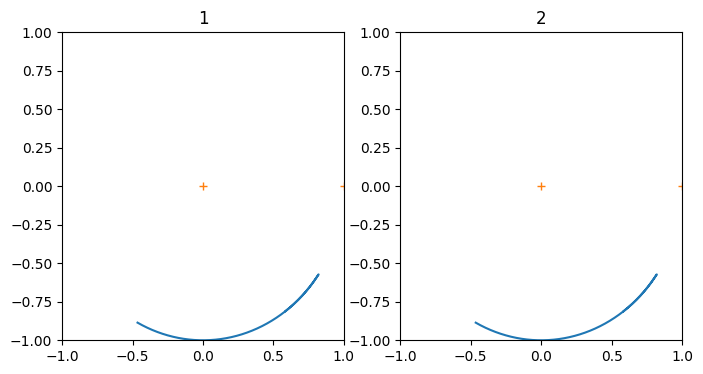

In [5]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(8,4))

axes[0].plot(np.sin(data_1),np.cos(data_1))
axes[1].plot(np.sin(data_2),np.cos(data_2))
axes[0].set_title("1")
axes[1].set_title("2")
axes[0].set_xlim(-1,1)
axes[0].set_ylim(-1,1)
axes[1].set_xlim(-1,1)
axes[1].set_ylim(-1,1)
axes[0].plot([0,0], marker='+', ls= 'none')
axes[1].plot([0,0], marker='+', ls= 'none')

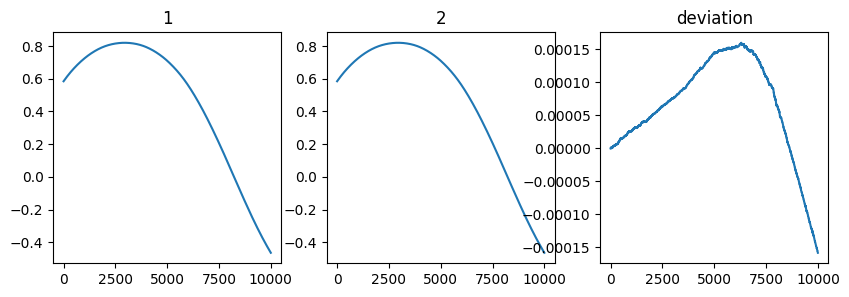

In [6]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

axes[0].plot(np.sin(data_1))
axes[1].plot(np.sin(data_2))
axes[0].set_title("1")
axes[1].set_title("2")
axes[2].set_title("deviation")
axes[2].plot(np.sin(data_1)-np.sin(data_2))

## MassSpringDamper

In [20]:
import time
import random
for batch_size in [10,100,1000,10000,100000]:
    env=excenv.make('MassSpringDamper-v0',batch_size=batch_size,k=[np.random.uniform(0,2) for _ in range(batch_size)])
    act=[env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))) for _ in range(10000)]
    env.reset(random_key=jax.random.PRNGKey(9))
    start_t = time.time()
    for i in range(10000):
        #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
        obs,reward,a,b,_ = env.step(act[i])
    ex_time= time.time() -start_t
    print(f"Batch_Size:{batch_size} - diffrax Computation Time: {ex_time} \n")

Batch_Size:10 - diffrax Computation Time: 0.16514992713928223 

Batch_Size:100 - diffrax Computation Time: 0.17015480995178223 

Batch_Size:1000 - diffrax Computation Time: 0.1981801986694336 

Batch_Size:10000 - diffrax Computation Time: 0.47643280029296875 

Batch_Size:100000 - diffrax Computation Time: 3.317108392715454 



### Compare 2 Envs

In [28]:
import time
import random
batch_size=5
sim_len=20000
env1=excenv.make('MassSpringDamper-v0',batch_size=batch_size,solver=diffrax.Euler())
env2=excenv.make('MassSpringDamper-v0',batch_size=batch_size,solver=diffrax.Dopri5())
act=[env1.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))) for _ in range(sim_len)]
act= np.zeros_like(act)
obs1_init,_=env1.reset(random_key=jax.random.PRNGKey(6))
obs2_init,_=env2.reset(random_key=jax.random.PRNGKey(6))
data_1=[]
data_2=[]
for i in range(sim_len):
    obs1,reward,a,b,_ = env1.step(act[i])
    obs2,reward,a,b,_ = env2.step(act[i])
    data_1.append(np.array(obs1)[1,0])
    data_2.append(np.array(obs2)[1,0])

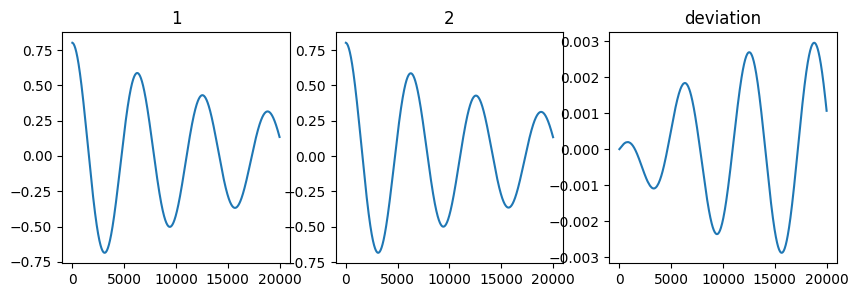

In [29]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

axes[0].plot(data_1)
axes[1].plot(data_2)
axes[0].set_title("1")
axes[1].set_title("2")
axes[2].set_title("deviation")
axes[2].plot((np.array(data_1)-np.array(data_2)))

## CartPole

In [33]:
import time
import random
for batch_size in [10,100,1000,10000,100000]:
    env=excenv.make('CartPole-v0',batch_size=batch_size,m_c=[np.random.uniform(0,2) for _ in range(batch_size)])
    act=[env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))) for _ in range(10000)]
    env.reset(random_key=jax.random.PRNGKey(9))
    start_t = time.time()
    for i in range(10000):
        #obs,reward,a,b,_ = env.step(env.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))))
        obs,reward,a,b,_ = env.step(act[i])
    ex_time= time.time() -start_t
    print(f"Batch_Size:{batch_size} - diffrax Computation Time: {ex_time} \n")

Batch_Size:10 - diffrax Computation Time: 0.22220110893249512 

Batch_Size:100 - diffrax Computation Time: 0.25823450088500977 

Batch_Size:1000 - diffrax Computation Time: 0.536487340927124 

Batch_Size:10000 - diffrax Computation Time: 4.35809588432312 

Batch_Size:100000 - diffrax Computation Time: 38.84166073799133 



### Compare 2 Ens

In [96]:
import time
import random
batch_size=5
sim_len=20000
env1=excenv.make('CartPole-v0',batch_size=batch_size,solver=diffrax.Euler())
env2=excenv.make('CartPole-v0',batch_size=batch_size,solver=diffrax.Dopri5())
act=[env1.action_space.sample(jax.random.PRNGKey(random.randint(0,100000))) for _ in range(sim_len)]
act= np.zeros_like(act)
obs1_init,_=env1.reset(random_key=jax.random.PRNGKey(5))
obs2_init,_=env2.reset(random_key=jax.random.PRNGKey(5))
data_1=[]
data_2=[]
for i in range(sim_len):
    obs1,reward,a,b,_ = env1.step(act[i])
    obs2,reward,a,b,_ = env2.step(act[i])
    data_1.append(np.array(obs1)[1,2]*np.pi)
    data_2.append(np.array(obs2)[1,2]*np.pi)

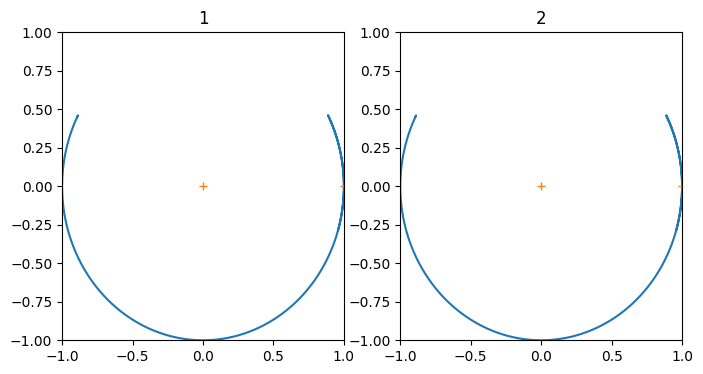

In [98]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(8,4))

axes[0].plot(np.sin(data_1),np.cos(data_1))
axes[1].plot(np.sin(data_2),np.cos(data_2))
axes[0].set_title("1")
axes[1].set_title("2")
axes[0].set_xlim(-1,1)
axes[0].set_ylim(-1,1)
axes[1].set_xlim(-1,1)
axes[1].set_ylim(-1,1)
axes[0].plot([0,0], marker='+', ls= 'none')
axes[1].plot([0,0], marker='+', ls= 'none')

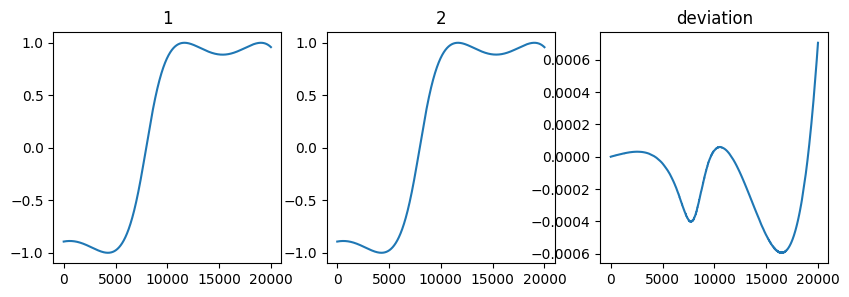

In [99]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

axes[0].plot(np.sin(data_1))
axes[1].plot(np.sin(data_2))
axes[0].set_title("1")
axes[1].set_title("2")
axes[2].set_title("deviation")
axes[2].plot(np.sin(data_1)-np.sin(data_2))